In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('weblogs.csv')
df.head()

df = df.drop(['NIGHT', 'ID'], axis=1)
df = df.drop('OTHER_METHOD', axis=1)

X = df.loc[:, df.columns != 'ROBOT']
y = df['ROBOT']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

numeric_cols = X.select_dtypes(['int64', 'float64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [10, 20, 30, 40, 50], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan'], 'algorithm': ['auto', 'ball_tree', 'kd_tree']}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

print(f"Best params: {knn_gscv.best_params_}\nBest score: {knn_gscv.best_score_}")

Best params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best score: 0.9258922291065158


In [6]:
# final_knn = knn_gscv.best_estimator_
# final_knn.fit(X_train, y_train)
# final_knn.score(X_test, y_test)

# from sklearn.metrics import classification_report, confusion_matrix

# y_pred = final_knn.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10785
           1       0.86      0.78      0.81      2686

    accuracy                           0.93     13471
   macro avg       0.90      0.87      0.89     13471
weighted avg       0.93      0.93      0.93     13471

[[10441   344]
 [  604  2082]]


In [7]:
param_grid2 = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto']
}

test = GridSearchCV(knn, param_grid2, cv=5)
test.fit(X_train, y_train)

print(f"Best params: {test.best_params_}\nBest score: {test.best_score_}")

Best params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best score: 0.9271727941609544


In [10]:
final_knn = test.best_estimator_
final_knn.fit(X_train, y_train)
final_knn.score(X_test, y_test)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = final_knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     10785
           1       0.84      0.80      0.82      2686

    accuracy                           0.93     13471
   macro avg       0.90      0.88      0.89     13471
weighted avg       0.93      0.93      0.93     13471

[[10381   404]
 [  543  2143]]


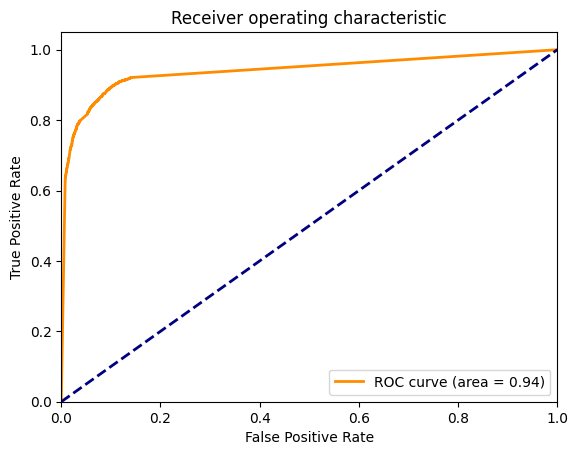

ROC AUC score: 0.939588988180614


In [11]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

y_pred_knn_prob = final_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC score: {roc_auc}")

In [12]:
# save the model to disk
import pickle
filename = './modellen/knn_classifier_final_model.sav'
pickle.dump(final_knn, open(filename, 'wb'))
